0. Import libraries

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Read the dataset

In [204]:
df = pd.read_excel("../Projects/dataset/archive/online_retail_II.xlsx")
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [206]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,541910.000000,541910,541910.000000,406830.000000
mean,9.552234,2011-07-04 13:35:22.342307584,4.611138,15287.684160
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.080957,NaN,96.759765,1713.603074


2. Preprocessing

In [207]:
df = df[(df[['Quantity', 'Price']] > 0).all(axis=1)]
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [208]:
df.duplicated().sum()

5226

In [209]:
df.drop_duplicates()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [210]:
df.drop(columns = ['Invoice', 'Description', 'Customer ID', 'Country'], inplace = True)
df.head(5)

,StockCode,Quantity,InvoiceDate,Price
0,85123A,6,2010-12-01 08:26:00,2.55
1,71053,6,2010-12-01 08:26:00,3.39
2,84406B,8,2010-12-01 08:26:00,2.75
3,84029G,6,2010-12-01 08:26:00,3.39
4,84029E,6,2010-12-01 08:26:00,3.39


In [211]:
df.shape

(530105, 4)

3. ABC segmentation

In [212]:
#Create function
def ABC_segmentation(perc):
    if perc > 0 and perc < 0.8:
        return 'A'
    elif perc >= 0.8 and perc < 0.95:
        return 'B'
    elif perc >= 0.95:
        return 'C'

In [213]:
#Calculate the revenue of each StockCode
df['Revenue'] = df['Price']*df['Quantity']

#Calculate total revenue of each StockCode
data_seg = df.groupby(['StockCode'], as_index= False)['Revenue'].sum()

#Order by revenue
data_seg = data_seg.sort_values(by = ['Revenue'], ascending =False).reset_index()

#Create the column of the total sum revenue
data_seg['TotalRev'] = data_seg['Revenue'].sum()

#Create the column of percentage of Revenue per StockCode
data_seg['%Rev'] = 100*(data_seg['Revenue']/data_seg['TotalRev'])

#Create the column of the cumulative revenue per StockCode
data_seg['CumRev'] = data_seg['Revenue'].cumsum()

#Create the column of the running percentage of CumRev
data_seg['PerCumTot'] = data_seg['CumRev']/data_seg['TotalRev']

# Create the column of the class by apply ABC_segmentation
data_seg['Class'] = data_seg['PerCumTot'].apply(ABC_segmentation)

#Create SKU_ID column
data_seg['SKU_ID'] = pd.Series(range(1, len(data_seg['PerCumTot']) + 1)).astype(int)
data_seg.head(10)

#Cumulative Percent of SKU
data_seg['SKU_%'] = (100 * pd.Series(range(1, len(data_seg['PerCumTot']) + 1)) / (len(data_seg['PerCumTot']) + 1))

data_seg.head(5)

,index,StockCode,Revenue,TotalRev,%Rev,CumRev,PerCumTot,Class,SKU_ID,SKU_%
0,3911,DOT,206248.77,1.066670e+07,1.933576,206248.77,0.019336,A,1,0.025491
1,1235,22423,174484.74,1.066670e+07,1.635789,380733.51,0.035694,A,2,0.050981
2,2390,23843,168469.60,1.066670e+07,1.579397,549203.11,0.051488,A,3,0.076472
3,3539,85123A,104518.80,1.066670e+07,0.979860,653721.91,0.061286,A,4,0.101963
4,2468,47566,99504.33,1.066670e+07,0.932850,753226.24,0.070615,A,5,0.127453


In [214]:
#Counts the quantity of each class
data_seg['Class'].value_counts()

Class
C    2136
B     983
A     803
Name: count, dtype: int64

In [215]:
#Total Revenue per Class
print ('Total Revenue of Class A :', data_seg[data_seg.Class == 'A']['Revenue'].sum())
print ('Total Revenue of Class B :', data_seg[data_seg.Class == 'B']['Revenue'].sum())
print ('Total Revenue of Class C :', data_seg[data_seg.Class == 'C']['Revenue'].sum())

Total Revenue of Class A : 8531530.49
Total Revenue of Class B : 1601157.4200000002
Total Revenue of Class C : 534014.6340000001


In [216]:
# Percent Total Revenue per Class
print ('% Total Revenue of Class A :', data_seg[data_seg.Class == 'A']['Revenue'].sum()/data_seg['Revenue'].sum())
print ('% Total Revenue of Class B :', data_seg[data_seg.Class == 'B']['Revenue'].sum()/data_seg['Revenue'].sum())
print ('% Total Revenue of Class C :', data_seg[data_seg.Class == 'C']['Revenue'].sum()/data_seg['Revenue'].sum())

% Total Revenue of Class A : 0.7998282932150359
% Total Revenue of Class B : 0.15010800323673115
% Total Revenue of Class C : 0.050063703548233134


In [217]:
# Percent Total SKU per Class
print ('% Total SKU of Class A :', data_seg[data_seg.Class == 'A']['Class'].count()/data_seg['Revenue'].count())
print ('% Total SKU of Class B :', data_seg[data_seg.Class == 'B']['Class'].count()/data_seg['Revenue'].count())
print ('% Total SKU of Class C :', data_seg[data_seg.Class == 'C']['Class'].count()/data_seg['Revenue'].count())

% Total SKU of Class A : 0.204742478327384
% Total SKU of Class B : 0.2506374298827129
% Total SKU of Class C : 0.5446200917899031


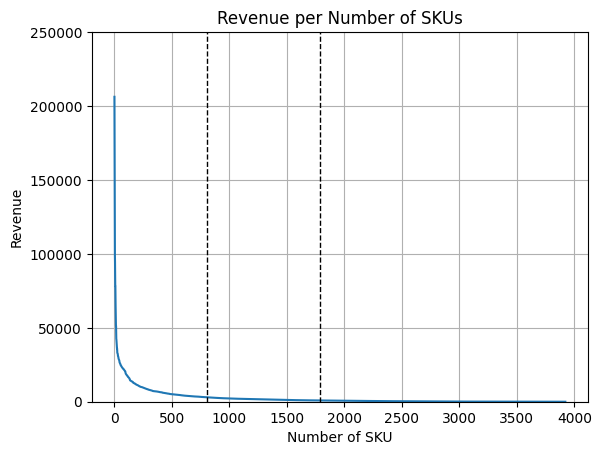

In [218]:
#Distribution of Revenue by Quantity of SKU
y_axis = pd.Series(range(1, len(data_seg['Revenue']) + 1))

lineA = data_seg[data_seg.Class == 'A']['Class'].count()
lineB = (data_seg[data_seg.Class == 'A']['Class'].count()) + (data_seg[data_seg.Class == 'B']['Class'].count())

plt.plot(y_axis, data_seg['Revenue'])
plt.ylabel('Revenue')
plt.xlabel('Number of SKU')
plt.title('Revenue per Number of SKUs')

plt.axvline(lineA , color="black", linestyle="--", linewidth = 1.0)
plt.axvline(lineB , color="black", linestyle="--", linewidth = 1.0)

plt.grid(True)
plt.ylim((0,250000))
plt.show()

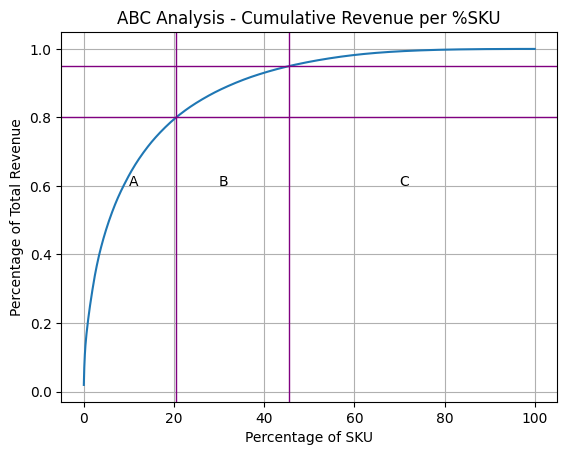

In [219]:
#Distribution of % Total Revenue by % SKU
lineA = 100*data_seg[data_seg.Class == 'A']['Class'].count()/data_seg['Revenue'].count()
lineB = 100*((data_seg[data_seg.Class == 'A']['Class'].count()/data_seg['Revenue'].count()) + (data_seg[data_seg.Class == 'B']['Class'].count()/data_seg['Revenue'].count()))

plt.plot(data_seg['SKU_%'], data_seg['PerCumTot'])
plt.xlabel('Percentage of SKU')
plt.ylabel('Percentage of Total Revenue')
plt.title('ABC Analysis - Cumulative Revenue per %SKU')

plt.axvline(lineA , color="purple", linestyle="-", linewidth = 1.0)
plt.axvline(lineB , color="purple", linestyle="-", linewidth = 1.0)

plt.axhline(0.8 , color="purple", linestyle="-", linewidth = 1.0)
plt.axhline(0.95 , color="purple", linestyle="-", linewidth = 1.0)

plt.text(10, 0.6, 'A')  
plt.text(30, 0.6, 'B')  
plt.text(70, 0.6, 'C ')  

plt.grid(True)
plt.show()

4. XYZ segmentation

In [220]:
#Create year and month columns
df['year'] = pd.DatetimeIndex(df['InvoiceDate']).year
df['month'] = pd.DatetimeIndex(df['InvoiceDate']).month
df.head(5)

,StockCode,Quantity,InvoiceDate,Price,Revenue,year,month
0,85123A,6,2010-12-01 08:26:00,2.55,15.30,2010,12
1,71053,6,2010-12-01 08:26:00,3.39,20.34,2010,12
2,84406B,8,2010-12-01 08:26:00,2.75,22.00,2010,12
3,84029G,6,2010-12-01 08:26:00,3.39,20.34,2010,12
4,84029E,6,2010-12-01 08:26:00,3.39,20.34,2010,12


In [221]:
#Create new dataframe with relative variables
data_seg2=df.groupby(['StockCode','year','month'])['Quantity'].sum().to_frame().reset_index()
#Reset month format
data_seg2["month"] = data_seg2.month.map("{:02}".format)  
#Create the column by merging year and month variables
data_seg2['year_month']=data_seg2['year'].map(str) + '-' + data_seg2['month'].map(str)

data_seg2.head(5)

,StockCode,year,month,Quantity,year_month
0,10002,2010,12,251,2010-12
1,10002,2011,01,340,2011-01
2,10002,2011,02,52,2011-02
3,10002,2011,03,28,2011-03
4,10002,2011,04,189,2011-04


In [222]:
#Long to wide format
data_seg2 = data_seg2.pivot( index= 'StockCode', columns='year_month', values='Quantity').reset_index()
data_seg2.head(5)

year_month,StockCode,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
0,10002,251.0,340.0,52.0,28.0,189.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10080,NaN,NaN,2.0,NaN,NaN,NaN,60.0,24.0,60.0,60.0,6.0,91.0,NaN
2,10120,16.0,NaN,30.0,29.0,NaN,3.0,NaN,5.0,35.0,10.0,10.0,49.0,6.0
3,10125,154.0,213.0,NaN,114.0,82.0,107.0,15.0,177.0,85.0,210.0,51.0,62.0,26.0
4,10133,130.0,180.0,39.0,83.0,76.0,33.0,526.0,830.0,763.0,207.0,NaN,NaN,NaN


In [223]:
#Replace NA value with zero
data_seg2.replace(np.nan, 0, inplace=True)
data_seg2.head(5)

year_month,StockCode,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
0,10002,251.0,340.0,52.0,28.0,189.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10080,0.0,0.0,2.0,0.0,0.0,0.0,60.0,24.0,60.0,60.0,6.0,91.0,0.0
2,10120,16.0,0.0,30.0,29.0,0.0,3.0,0.0,5.0,35.0,10.0,10.0,49.0,6.0
3,10125,154.0,213.0,0.0,114.0,82.0,107.0,15.0,177.0,85.0,210.0,51.0,62.0,26.0
4,10133,130.0,180.0,39.0,83.0,76.0,33.0,526.0,830.0,763.0,207.0,0.0,0.0,0.0


In [224]:
#Create function
def XYZ_segmentation(cv):
    if cv < 0.5:
        return 'X'
    elif cv >= 0.5 and cv <= 1:
        return 'Y'
    elif cv > 1:
        return 'Z'

In [225]:
#Calculate Average sales:
data_seg2['Average'] = data_seg2.iloc[:,1:13].mean(axis=1)

#Calculate Standard deviation sales:
data_seg2['Std'] = data_seg2.iloc[:,1:13].std(axis=1)

#Calculate Coefficient of Variation sales:
data_seg2['CV'] = data_seg2['Std']/data_seg2['Average']

#Drop the null value
data_seg2.dropna(inplace=True)

#Order by CV
data_seg2.sort_values(by=['CV'], ascending=True, inplace=True)

#Apply XYZ_segmentation
data_seg2['Class'] = data_seg2['CV'].apply(XYZ_segmentation)

data_seg2.head(5)

year_month,StockCode,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,Average,Std,CV,Class
1268,22457,613.0,801.0,518.0,855.0,688.0,692.0,509.0,773.0,547.0,676.0,767.0,805.0,928.0,687.000000,118.478230,0.172457,X
1568,22771,436.0,350.0,685.0,562.0,687.0,533.0,656.0,426.0,599.0,571.0,468.0,585.0,77.0,546.500000,107.736632,0.197139,X
1468,22670,134.0,155.0,119.0,167.0,142.0,123.0,107.0,147.0,223.0,167.0,127.0,154.0,118.0,147.083333,30.515148,0.207468,X
1495,22697,466.0,334.0,642.0,500.0,515.0,662.0,655.0,679.0,554.0,813.0,642.0,523.0,317.0,582.083333,125.095206,0.214909,X
1590,22796,36.0,54.0,47.0,56.0,50.0,55.0,31.0,49.0,36.0,54.0,37.0,67.0,12.0,47.666667,10.654349,0.223518,X


5. Merge ABC and XYZ classes

In [226]:
abc_merge = data_seg[['StockCode', 'Class', '%Rev']]
xyz_merge = data_seg2[['StockCode', 'Class', 'CV']]

abc_xyz = pd.merge( abc_merge, xyz_merge,  how='left', on='StockCode')
abc_xyz['ABC_XYZ'] = abc_xyz['Class_x'].map(str) + abc_xyz['Class_y'].map(str)

abc_xyz.head(5)

,StockCode,Class_x,%Rev,Class_y,CV,ABC_XYZ
0,DOT,A,1.933576,X,0.255975,AX
1,22423,A,1.635789,X,0.323048,AX
2,23843,A,1.579397,NaN,NaN,Anan
3,85123A,A,0.979860,X,0.429843,AX
4,47566,A,0.932850,Y,0.654970,AY


In [227]:
#Number of StockCode of each category:
print ('Number of StockCode of AX:', abc_xyz[abc_xyz.ABC_XYZ== 'AX']['ABC_XYZ'].count())
print ('Number of StockCode of AY:', abc_xyz[abc_xyz.ABC_XYZ== 'AY']['ABC_XYZ'].count())
print ('Number of StockCode of AZ:', abc_xyz[abc_xyz.ABC_XYZ== 'AZ']['ABC_XYZ'].count())
print ('Number of StockCode of BX:', abc_xyz[abc_xyz.ABC_XYZ== 'BX']['ABC_XYZ'].count())
print ('Number of StockCode of BY:', abc_xyz[abc_xyz.ABC_XYZ== 'BY']['ABC_XYZ'].count())
print ('Number of StockCode of BZ:', abc_xyz[abc_xyz.ABC_XYZ== 'BZ']['ABC_XYZ'].count())
print ('Number of StockCode of CX:', abc_xyz[abc_xyz.ABC_XYZ== 'CX']['ABC_XYZ'].count())
print ('Number of StockCode of CY:', abc_xyz[abc_xyz.ABC_XYZ== 'CY']['ABC_XYZ'].count())
print ('Number of StockCode of CZ:', abc_xyz[abc_xyz.ABC_XYZ== 'CZ']['ABC_XYZ'].count())

Number of StockCode of AX: 201
Number of StockCode of AY: 310
Number of StockCode of AZ: 291
Number of StockCode of BX: 105
Number of StockCode of BY: 370
Number of StockCode of BZ: 508
Number of StockCode of CX: 19
Number of StockCode of CY: 385
Number of StockCode of CZ: 1730


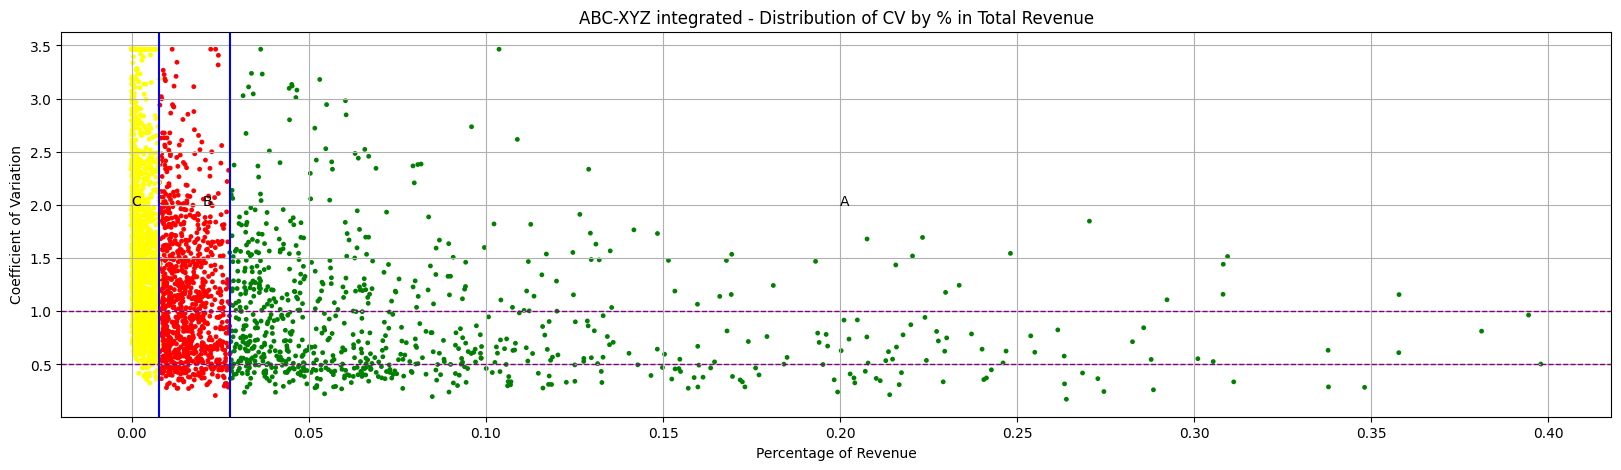

In [228]:
#Distribution of CV by %Rev
limit_C = abc_xyz[abc_xyz.Class_x == 'C']['%Rev'].max()
limit_B = abc_xyz[abc_xyz.Class_x == 'B']['%Rev'].max()

plt.figure(figsize=(20,5))
colors = {'A':'green', 'B':'red', 'C':'yellow'}

abc_xyz = abc_xyz[abc_xyz['%Rev']<0.4].copy() #Remove outliers

plt.scatter(abc_xyz['%Rev'], abc_xyz['CV'], color=abc_xyz['Class_x'].map(colors), s= 6)
plt.xlabel('Percentage of Revenue')
plt.ylabel('Coefficient of Variation')
plt.title('ABC-XYZ integrated - Distribution of CV by % in Total Revenue')

plt.axvline(limit_C , color="blue", linestyle="-", linewidth = 1.5)
plt.axvline(limit_B , color="blue", linestyle="-", linewidth = 1.5)

plt.axhline(0.5 , color="purple", linestyle="--", linewidth = 1.0)
plt.axhline(1 , color="purple", linestyle="--", linewidth = 1.0)

plt.text(0.2, 2, 'A')  
plt.text(0.02, 2, 'B')  
plt.text(0.0, 2, 'C ')  

plt.grid(True)
plt.show()